In [11]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from pandas import read_csv
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

from matplotlib import pyplot

In [11]:
###### Loading datasets ########

# Load train dataset
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/category_75nM/promoters/k27ac/full_data.csv'
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/full_rh4_data.csv'
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/up_fraction_test.csv"
train_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/up_fraction_test_gene_list.csv",
                      header=0, index_col=False)

#train_url = '/Users/agrawalp4/Downloads/train.csv'
dataframe_train = read_csv(train_url, header=0, index_col=False)
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-1], data_train[0:, -1]

# Load test dataset
#test_url = '/Users/agrawalp4/Documents/Varun_work/ml/HBEC/prom_tss.csv'
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/up_fraction_train.csv"
test_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/up_fraction_train_gene_list.csv",
                      header=0, index_col=False)
dataframe_test = read_csv(test_url, header=0, index_col=False)
data_test = dataframe_test.values
X_test, y_test = data_test[:, :-1], data_test[0:, -1]

In [12]:
###### Loading datasets ########

# Load train dataset
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/category_75nM/promoters/k27ac/full_data.csv'
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/full_rh4_data.csv'
total_train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_test.csv"
total_train_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_test_gene_list.csv",
                      header=0, index_col=False)

#train_url = '/Users/agrawalp4/Downloads/train.csv'
total_dataframe_train = read_csv(total_train_url, header=0, index_col=False)
total_data_train = total_dataframe_train.values
total_X_train, total_y_train = total_data_train[:, :-1], total_data_train[0:, -1]

# Load test dataset
#test_url = '/Users/agrawalp4/Documents/Varun_work/ml/HBEC/prom_tss.csv'
total_test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_train.csv"
total_test_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_train_gene_list.csv",
                      header=0, index_col=False)
total_dataframe_test = read_csv(total_test_url, header=0, index_col=False)
total_data_test = total_dataframe_test.values
total_X_test, total_y_test = total_data_test[:, :-1], total_data_test[0:, -1]

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951568
roc_auc on test data : 0.528279


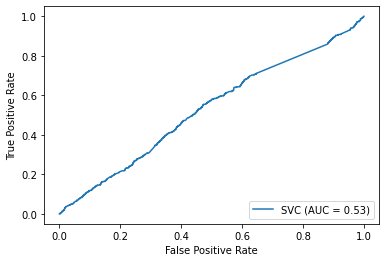

In [13]:
####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(total_X_train, total_y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)
# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

#r2_score_res = r2_score(y_test, y_pred)
#print("r^2 on test data : %f" % r2_score_res)

In [14]:
X_test
print(len(y_test))
print(len(y_train))
print(dataframe_train.shape)

13466
3366
(3366, 14)


In [ ]:
X_test
print(len(y_test))
print(len(y_train))
print(dataframe_train.shape)

In [14]:
def svc_model(X_train, y_train, X_test, y_test):
    clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
    clf.fit(X_train, y_train)
    np.random.seed(786)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)
    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def random_forest_model(X_train, y_train, X_test, y_test):
    np.random.seed(786)

    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def ada_boost_model(X_train, y_train, X_test, y_test):

    clf = AdaBoostClassifier(n_estimators=10)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def gradient_boost_model(X_train, y_train, X_test, y_test):
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)
    
def logistic_regression_model(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def extra_trees_model(X_train, y_train, X_test, y_test):
    clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)


0
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950679
roc_auc on test data : 0.493771
1
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.493398
2
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.521861
3
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951036
roc_auc on test data : 0.491641
4
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.559372
5
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.539816
6
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.520493
7
####### Random Forest Classifier ####
Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.522427
8
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.453508
9
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.488068
10
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.493398
11
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.521861
12
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951036
roc_auc on test data : 0.491641
13
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.559372
14
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.539816
15
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.520493
16
####### Random Forest Classifier ####
Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.522427
17
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.453508
18
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.488068


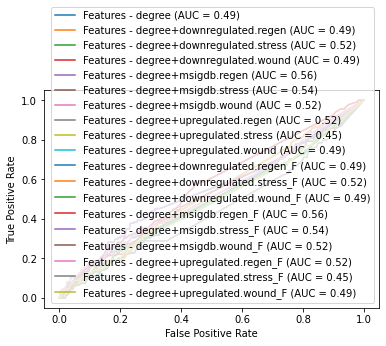

In [15]:
ax = plt.gca()
for feat in range(0,len(total_dataframe_train.columns)-1):
    print(feat)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, [feat]], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, [feat]], data_test[0:, -1]
    
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)

    
    if feat == 0:
        curve_name = "Features - " + dataframe_train.columns[feat]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax = ax)
    else:
        curve_name = "Features - degree+" + dataframe_train.columns[feat][:-18]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=ax)
    

In [16]:
cols = dataframe_train.columns.tolist()
cols = [cols[0],cols[2],cols[1],cols[8],cols[5],cols[3],cols[6],cols[7],cols[9],cols[4], "label"]

In [17]:
feat = 8
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-feat], data_train[0:, -1]
X_train

array([[1.10000000e+01, 2.02718817e-03, 3.10040544e-03],
       [2.00000000e+00, 1.43095636e-03, 1.55020272e-03],
       [1.00000000e+01, 7.27402814e-03, 7.39327451e-03],
       ...,
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.20000000e+01, 1.68137372e-02, 2.03911281e-02],
       [9.60000000e+01, 1.07321727e-03, 9.53970904e-04]])

In [18]:
feat = 5
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-feat], data_train[0:, -1]
X_train

array([[8.00000000e+00, 1.39518245e-02, 2.52802290e-02, 1.47865490e-02,
        2.61149535e-02, 1.86024326e-02],
       [1.80000000e+01, 5.96231815e-03, 4.17362270e-03, 2.98115907e-03,
        1.01359409e-02, 7.03553542e-03],
       [8.20000000e+01, 7.51252087e-03, 1.33555927e-02, 1.16861436e-02,
        2.33722871e-02, 1.89601717e-02],
       ...,
       [6.40000000e+01, 1.86024326e-02, 2.30145481e-02, 1.78869544e-02,
        3.57739089e-02, 1.93179108e-02],
       [3.00000000e+00, 1.55020272e-03, 3.57739089e-03, 2.26568090e-03,
        5.48533270e-03, 1.07321727e-02],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

1
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.526666
####### Random Forest Classifier ####
Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.562229
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.601709
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.616781
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.10
Average recall score: 0.01
f1 on test data : 0.013793
Accuray on test data : 0.948892
roc_auc on test data : 0.502014
2
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.496937
####### Random Forest Classifier ####
Average precision score: 0.33
Average recall score: 0.01
f1 on test data : 0.028369
Accuray on test data : 0.951036
roc_auc on test data : 0.571949
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.602363
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.614135
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.09
Average recall score: 0.01
f1 on test data : 0.013699
Accuray on test data : 0.948535
roc_auc on test data : 0.501826
3
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.482347
####### Random Forest Classifier ####
Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.568148
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.602363
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.611151
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.11
Average recall score: 0.01
f1 on test data : 0.013889
Accuray on test data : 0.949249
roc_auc on test data : 0.502202
4
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.474882
####### Random Forest Classifier ####
Average precision score: 0.33
Average recall score: 0.01
f1 on test data : 0.014493
Accuray on test data : 0.951394
roc_auc on test data : 0.578828
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.588741
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.609050
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.503140
5
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.491865
####### Random Forest Classifier ####
Average precision score: 0.33
Average recall score: 0.01
f1 on test data : 0.014493
Accuray on test data : 0.951394
roc_auc on test data : 0.595296
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.587488
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.614046
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.10
Average recall score: 0.01
f1 on test data : 0.013793
Accuray on test data : 0.948892
roc_auc on test data : 0.502014
6
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.506581
####### Random Forest Classifier ####
Average precision score: 0.33
Average recall score: 0.01
f1 on test data : 0.014493
Accuray on test data : 0.951394
roc_auc on test data : 0.595709
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.584689
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.612208
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.10
Average recall score: 0.01
f1 on test data : 0.013793
Accuray on test data : 0.948892
roc_auc on test data : 0.502014
7
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.481959
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.536237
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.544912
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.566633
####### Logistic_regression Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.10
Average recall score: 0.01
f1 on test data : 0.013793
Accuray on test data : 0.948892
roc_auc on test data : 0.502014
8
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.455942
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.948177
roc_auc on test data : 0.534983
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.557418
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.581582
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.944246
roc_auc on test data : 0.496057
9
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.466046
####### Random Forest Classifier ####
Average precision score: 0.05
Average recall score: 0.01
f1 on test data : 0.012987
Accuray on test data : 0.945675
roc_auc on test data : 0.493467
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.572655
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.550063
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.942816
roc_auc on test data : 0.495306
10
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.460914
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.496045
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.545054
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.545212
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.499812


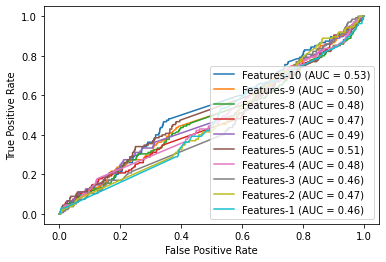

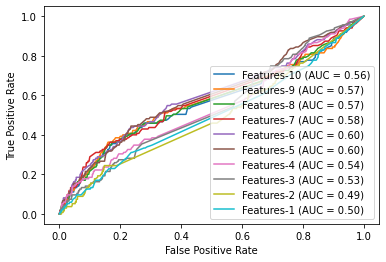

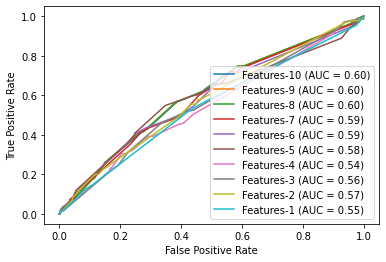

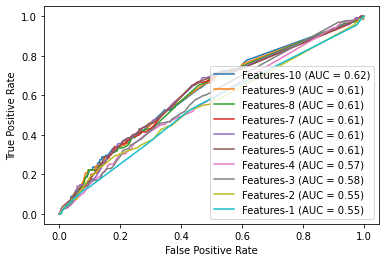

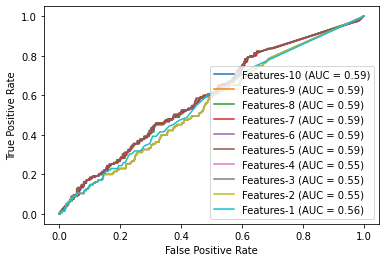

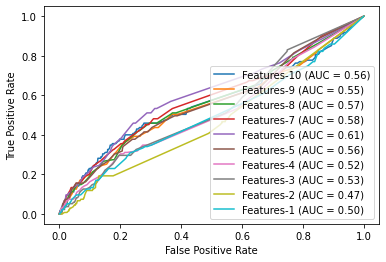

In [19]:
svm_plt_list = []
rf_plt_list = []
ada_boost_plt_list = []
gradient_boost_plt_list = []
log_reg_plt_list = []
extra_trees_plt_list = []
for feat in range(1,len(dataframe_train.columns)):
    print(feat)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    dataframe_train = dataframe_train[cols]
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, :-feat], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    dataframe_test = dataframe_test[cols]
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, :-feat], data_test[0:, -1]
    
    print("####### Support Vector Classifier ####")
    svm_clf = svc_model(X_train, y_train, X_test, y_test)
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)
    print("####### AdaBoost Classifier ####")
    ada_boost_clf = ada_boost_model(X_train, y_train, X_test, y_test)
    print("####### Gradient Boost Classifier ####")
    gradient_boost_clf = gradient_boost_model(X_train, y_train, X_test, y_test)
    print("####### Logistic_regression Classifier ####")
    log_reg_clf = logistic_regression_model(X_train, y_train, X_test, y_test)
    print("####### Extra Trees Classifier ####")
    extra_trees_clf = extra_trees_model(X_train, y_train, X_test, y_test)

    
    if feat == 1:
        curve_name = "Features-" + str(len(dataframe_train.columns)-1)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name))
        extra_trees_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
    else:
        curve_name = "Features-" + str(len(dataframe_train.columns)-feat)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name, ax=svm_plt_list[feat - 2].ax_))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=rf_plt_list[feat - 2].ax_))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name, ax=ada_boost_plt_list[feat - 2].ax_))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name, ax=gradient_boost_plt_list[feat - 2].ax_))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name, ax=log_reg_plt_list[feat - 2].ax_))
        extra_trees_plt_list.append(plot_roc_curve(extra_trees_clf, X_test, y_test, name = curve_name, ax=extra_trees_plt_list[feat - 2].ax_))
    

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951568
roc_auc on test data : 0.528279


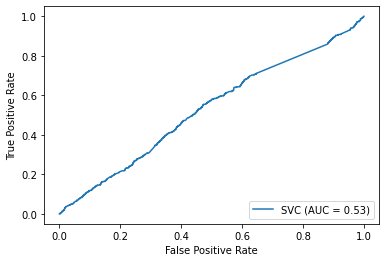

In [20]:

####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(total_X_train, total_y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)
# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

In [35]:
# res = pd.DataFrame(y_pred1)
# res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/hct_svm_pred", sep=',', index=False)

In [5]:
#y_pred1

In [23]:
# ####### Random Forest Classifier ####
# import random
# from sklearn.ensemble import RandomForestClassifier
# np.random.seed(786)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train, y_train)

# # make a prediction
# y_pred = clf.predict(X_test)
# y_pred1 = clf.predict_proba(X_test)

# # summarize prediction

# average_precision = precision_score(y_test, y_pred)
# print('Average precision score: {0:0.2f}'.format(average_precision))

# average_recall = recall_score(y_test, y_pred)
# print('Average recall score: {0:0.2f}'.format(average_recall))

# score_res = f1_score(y_test,y_pred)
# print("f1 on test data : %f" % score_res)

# score_res = accuracy_score(y_test,y_pred)
# print("Accuray on test data : %f" % score_res)

# score_res = roc_auc_score(y_test,y_pred1[:,1])
# print("roc_auc on test data : %f" % score_res)

# plot_roc_curve(clf, X_test, y_test)

In [24]:
# y_pred1

In [25]:
# test_genes['x']

In [26]:
# score_df = pd.DataFrame(y_pred1, test_genes['x'])
# print(score_df.head())
# prediction_df =  pd.DataFrame(y_pred, test_genes['x'])
# print(prediction_df.head())
# actual_df = pd.DataFrame(y_test, test_genes['x'])
# print(actual_df.head())
# final_prediction_df = pd.concat([score_df, prediction_df, actual_df], axis = 1, ignore_index = True)

# print(final_prediction_df.head())

In [27]:
# actual_value_scores.loc[actual_value_scores[1] == 1][0]

In [30]:
# actual_value_scores = pd.concat([score_df[1], actual_df], axis = 1, ignore_index = True)
# print(actual_value_scores.head())
# ax = actual_value_scores.boxplot(by=1,
#                                  fontsize=8,
#                                  layout=(2,1),
#                                  rot=90,
#                                  figsize=(10,20)
#                                 )

# ax[0].set_title('Distribution of Random Forest Model Score')
# ax[0].set_xlabel('COSMIC Cancer Driver Status')
# ax[0].set_ylabel('Random Forest Model socre')
# mannwhitneyu(actual_value_scores.loc[actual_value_scores[1] == 1][0],
# #                 actual_value_scores.loc[actual_value_scores[1] == 0][0])

In [31]:
# actual_value_scores.loc[actual_value_scores[1] > 1][0]

In [32]:
# round(len(actual_value_scores)*.1)

In [33]:
# top_10_highest_scoring = actual_value_scores.sort_values(0).tail(round(len(actual_value_scores)*.1))
# top_10_lowest_scoring = actual_value_scores.sort_values(0).head(round(len(actual_value_scores)*.1))

In [34]:
# output_df_high = pd.DataFrame({"Gene": top_10_highest_scoring.index.values,
#                           "GeneType" : ['high']*len(top_10_highest_scoring)})
# output_df_low = pd.DataFrame({"Gene": top_10_lowest_scoring.index.values,
#                           "GeneType" : ['low']*len(top_10_lowest_scoring)})
# final_output_df = pd.concat([output_df_high, output_df_low], axis = 0, ignore_index = True)
# final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/up_ml_pred.txt", sep='\t', index=False)

In [10]:
dataframe_train

,degree,downregulated.stress_Fraction_sp_less4,downregulated.regen_Fraction_sp_less4,upregulated.stress_Fraction_sp_less4,msigdb.stress_Fraction_sp_less4,downregulated.wound_Fraction_sp_less4,msigdb.wound_Fraction_sp_less4,upregulated.regen_Fraction_sp_less4,upregulated.wound_Fraction_sp_less4,msigdb.regen_Fraction_sp_less4,label
0,6,0.002981,0.000596,0.001192,0.006320,0.001550,0.000477,0.001550,0.002385,0.000000,1
1,2,0.008109,0.021703,0.009778,0.016814,0.018125,0.011686,0.013117,0.015979,0.003697,1
2,9,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
3,9,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1
4,4,0.000000,0.000000,0.000000,0.000238,0.000119,0.000358,0.000000,0.000119,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
11186,426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0
11187,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
11188,1,0.016814,0.020033,0.015144,0.028738,0.019914,0.010136,0.018841,0.021345,0.003339,0
11189,26,0.000477,0.000835,0.000119,0.001908,0.000715,0.000119,0.001669,0.000358,0.000119,0


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.584239


RandomForestClassifier(n_estimators=1000)

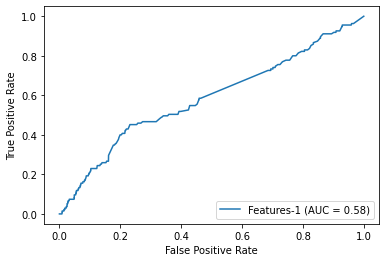

In [21]:
####### Random Forest Classifier ####
import random
from sklearn.ensemble import RandomForestClassifier

# Load train dataset
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-1], data_train[0:, -1]

# Load test dataset
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/hPPIN_pan_tissue_EXP_total_fraction_test.csv"
dataframe_test = read_csv(test_url, header=0)
dataframe_test = dataframe_test[cols]
data_test = dataframe_test.values
X_test, y_test = data_test[:, :-1], data_test[0:, -1]

np.random.seed(786)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res_f1 = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res_f1)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test, name = curve_name)
clf

In [22]:
# calculate prc
precision, recall, thresholds = precision_recall_curve(y_test, pd.DataFrame(y_pred1)[1])

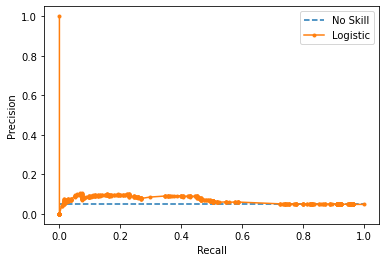

In [23]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
total_score_df = pd.DataFrame(total_y_pred1, total_test_genes['x'])
print(total_score_df.head())
total_prediction_df =  pd.DataFrame(total_y_pred, total_test_genes['x'])
print(total_prediction_df.head())
total_actual_df = pd.DataFrame(total_y_test, total_test_genes['x'])
print(total_actual_df.head())
total_final_prediction_df = pd.concat([total_score_df, total_prediction_df, total_actual_df], axis = 1, ignore_index = True)

print(total_final_prediction_df.head())

NameError: name 'total_y_pred1' is not defined

In [ ]:
total_actual_value_scores = pd.concat([total_score_df[1], total_actual_df], axis = 1, ignore_index = True)
print(total_actual_value_scores.head())
total_ax = total_actual_value_scores.boxplot(by=1,
                                 fontsize=8,
                                 layout=(2,1),
                                 rot=90,
                                 figsize=(10,20)
                                )

total_ax[0].set_title('Distribution of Random Forest Model Score')
total_ax[0].set_xlabel('COSMIC Cancer Driver Status')
total_ax[0].set_ylabel('Random Forest Model socre')
mannwhitneyu(total_actual_value_scores.loc[total_actual_value_scores[1] == 1][0],
                total_actual_value_scores.loc[total_actual_value_scores[1] == 0][0])

In [30]:
non_cancer_drivers = total_actual_value_scores.loc[total_actual_value_scores[1] !=  1]

In [31]:
total_top_10_highest_scoring = non_cancer_drivers.sort_values(0).tail(round(len(non_cancer_drivers)*.1))
total_top_10_lowest_scoring = non_cancer_drivers.sort_values(0).head(round(len(non_cancer_drivers)*.1))

In [32]:
total_output_df_high = pd.DataFrame({"Gene": total_top_10_highest_scoring.index.values,
                          "GeneType" : ['high']*len(total_top_10_highest_scoring)})
total_output_df_low = pd.DataFrame({"Gene": total_top_10_lowest_scoring.index.values,
                          "GeneType" : ['low']*len(total_top_10_lowest_scoring)})
final_output_df = pd.concat([total_output_df_high, total_output_df_low], axis = 0, ignore_index = True)
final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/total_ml_pred.txt", sep='\t', index=False)

#y_pred1
#res = pd.DataFrame(y_pred1)
#res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/HBEC/up_unchange/gene_rf_pred", sep=',', index=False)

Average precision score: 0.36
Average recall score: 0.04
f1 on test data : 0.067002
Accuray on test data : 0.958637
roc_auc on test data : 0.752001


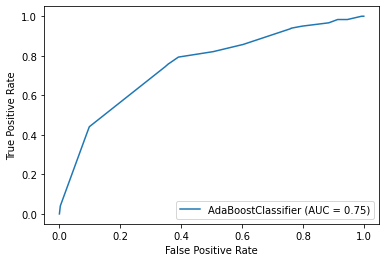

In [14]:
####### AdaBoost Classifier ####
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

Average precision score: 0.42
Average recall score: 0.03
f1 on test data : 0.058419
Accuray on test data : 0.959305
roc_auc on test data : 0.759152


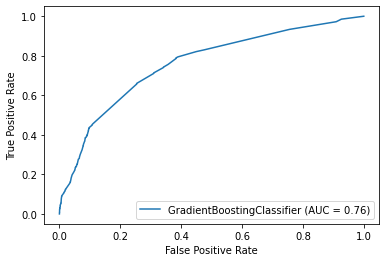

In [15]:
####### Gradient Boosting Classifier ####
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.959750
roc_auc on test data : 0.500000


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


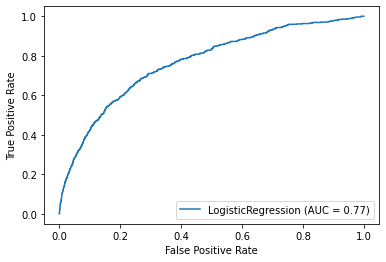

In [16]:
####### Logistic Regression Classifier ####
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

Average precision score: 0.47
Average recall score: 0.03
f1 on test data : 0.058824
Accuray on test data : 0.959602
roc_auc on test data : 0.514948


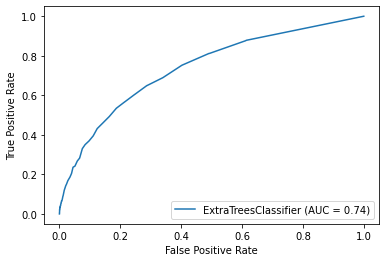

In [17]:
####### ExtraTree Classifier ####
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)